In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
trace = pd.read_csv('chapter3_trace-simple_selfloops.csv')
trace

,job_id,dataset,model,reciprocal,job,job_type,split,epoch,avg_loss,avg_penalty,...,train.optimizer_args.lr,train.lr_scheduler_args.patience,lookup_embedder.dim,lookup_embedder.initialize,lookup_embedder.regularize,lookup_embedder.regularize_args.weighted,simple.entity_embedder.regularize_weight,simple.relation_embedder.regularize_weight,simple.entity_embedder.dropout,simple.relation_embedder.dropout
0,e9b0e007,/bp1/mrcieu1/users/fu19841/kge/data/selfloops,simple,0,search,negative_sampling,valid,30,NaN,NaN,...,0.014126,7,128,normal_,lp,False,2.171879e-13,2.937767e-05,0.262571,0.244941
1,e9b0e007,/bp1/mrcieu1/users/fu19841/kge/data/selfloops,simple,0,search,KvsAll,valid,420,NaN,NaN,...,0.000609,4,32,uniform_,lp,True,5.027007e-18,4.680830e-19,0.166188,0.035968
2,e9b0e007,/bp1/mrcieu1/users/fu19841/kge/data/selfloops,simple,0,search,negative_sampling,valid,55,NaN,NaN,...,0.096135,10,128,xavier_normal_,NaN,False,4.714602e-03,1.530229e-06,0.492019,0.318780
3,e9b0e007,/bp1/mrcieu1/users/fu19841/kge/data/selfloops,simple,0,search,1vsAll,valid,40,NaN,NaN,...,0.026992,8,256,uniform_,lp,False,7.599944e-15,4.774237e-10,0.015407,0.071647
4,e9b0e007,/bp1/mrcieu1/users/fu19841/kge/data/selfloops,simple,0,search,negative_sampling,valid,25,NaN,NaN,...,0.001301,6,64,xavier_uniform_,NaN,True,8.060631e-11,7.190952e-18,0.330292,0.292874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2c7190ba,/bp1/mrcieu1/users/fu19841/kge/data/selfloops,simple,0,search,KvsAll,valid,15,NaN,NaN,...,0.038235,8,64,xavier_normal_,lp,True,7.062948e-07,4.884917e-14,0.452988,0.300773
96,2c7190ba,/bp1/mrcieu1/users/fu19841/kge/data/selfloops,simple,0,search,negative_sampling,valid,55,NaN,NaN,...,0.001809,6,512,uniform_,lp,False,2.380107e-12,1.181214e-02,0.142711,0.079373
97,2c7190ba,/bp1/mrcieu1/users/fu19841/kge/data/selfloops,simple,0,search,KvsAll,valid,55,NaN,NaN,...,0.000306,4,256,xavier_uniform_,lp,False,3.696079e-05,3.226873e-06,0.353729,0.342242
98,2c7190ba,/bp1/mrcieu1/users/fu19841/kge/data/selfloops,simple,0,search,negative_sampling,valid,55,NaN,NaN,...,0.049155,10,32,uniform_,lp,True,1.102647e-18,8.570622e-13,0.054479,0.059381


In [4]:
trace.dtypes

job_id                                         object
dataset                                        object
model                                          object
reciprocal                                      int64
job                                            object
job_type                                       object
split                                          object
epoch                                           int64
avg_loss                                      float64
avg_penalty                                   float64
avg_cost                                      float64
metric_name                                    object
metric                                        float64
child_folder                                    int64
child_job_id                                   object
train.batch_size                                int64
train.type                                     object
train.optimizer                                object
train.loss                  

In [7]:
def plot(hyperparameter):
    response_var = 'metric'
    dtype = trace[hyperparameter].dtype
    if dtype == object:
        plotter = sns.barplot
    else:
        plotter = sns.lineplot
    plotter(trace, x=hyperparameter, y=response_var)
    plt.title(hyperparameter)
    plt.xlabel(hyperparameter)
    if 'regularize_weight' in hyperparameter or 'lr' in hyperparameter:
        plt.xscale('log')
    plt.show()

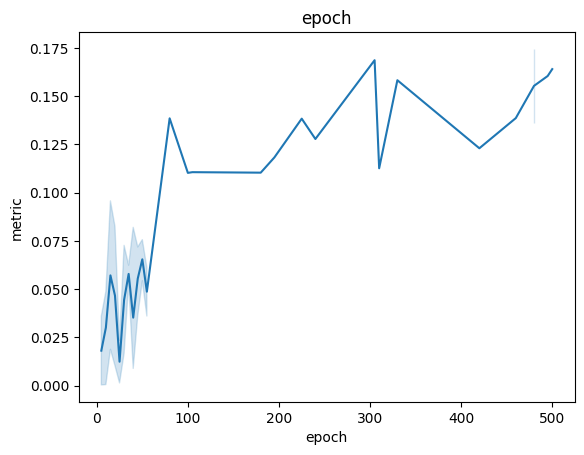

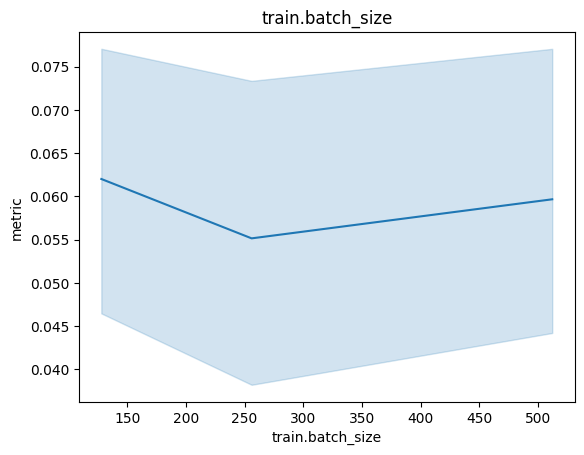

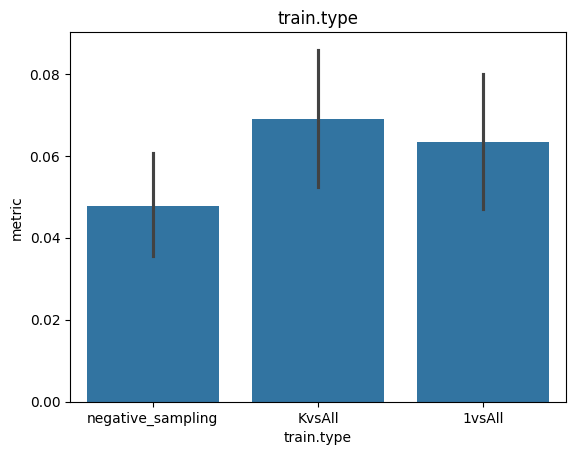

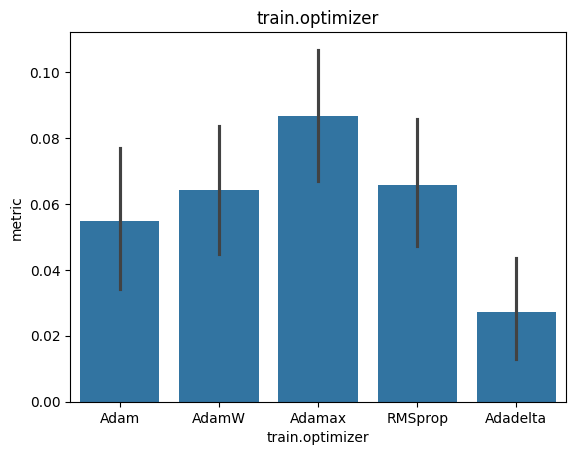

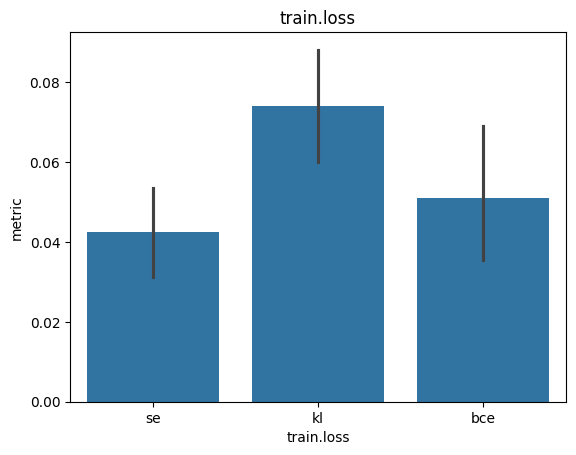

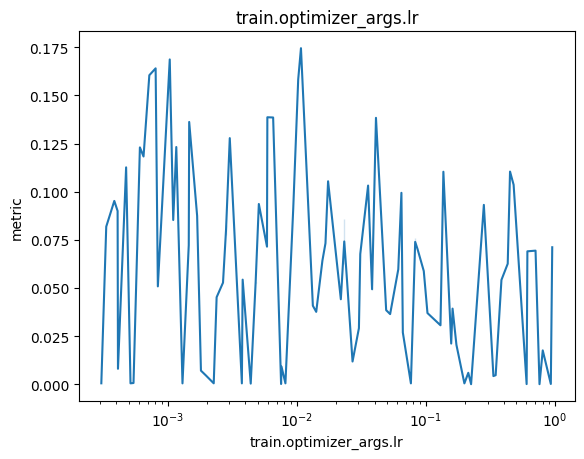

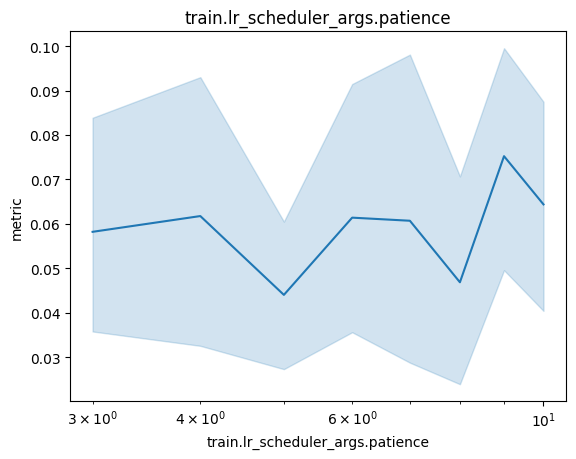

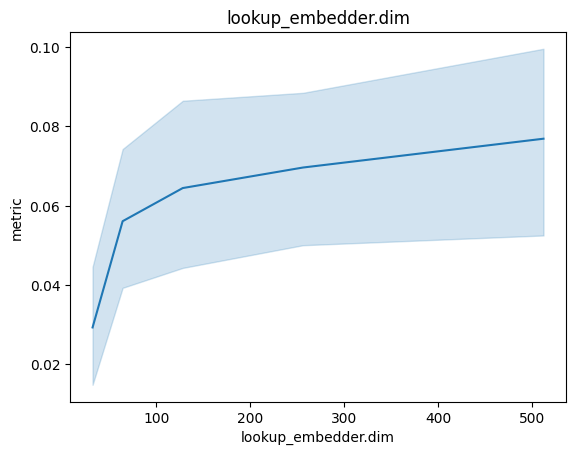

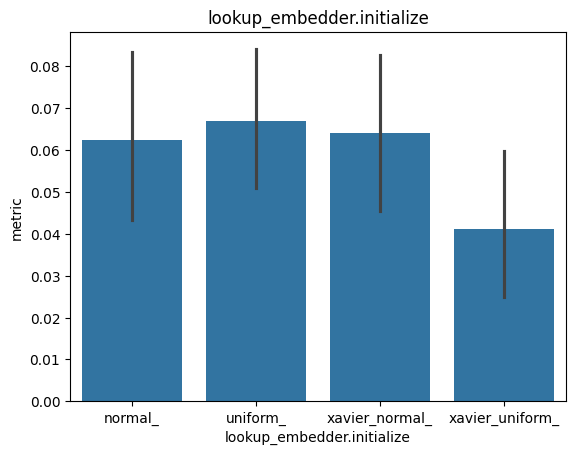

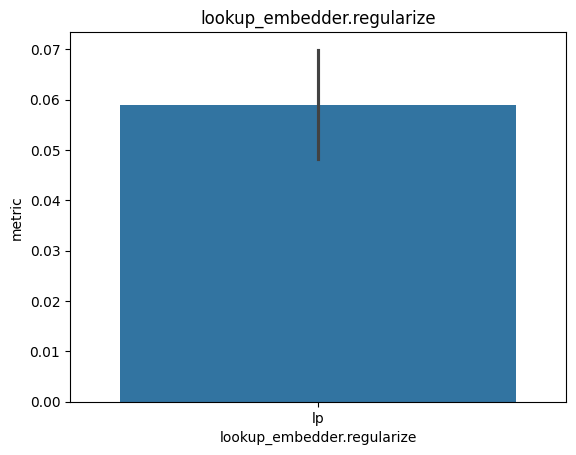

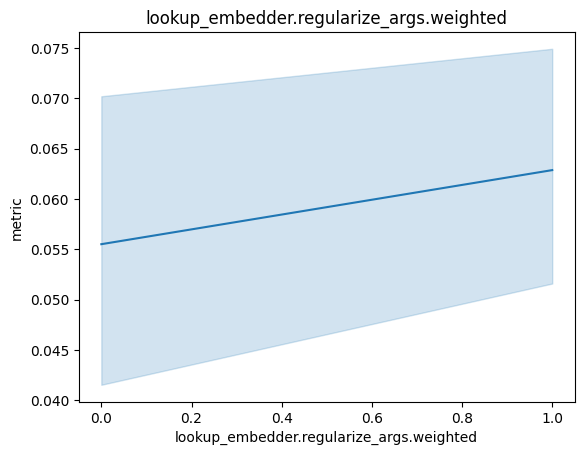

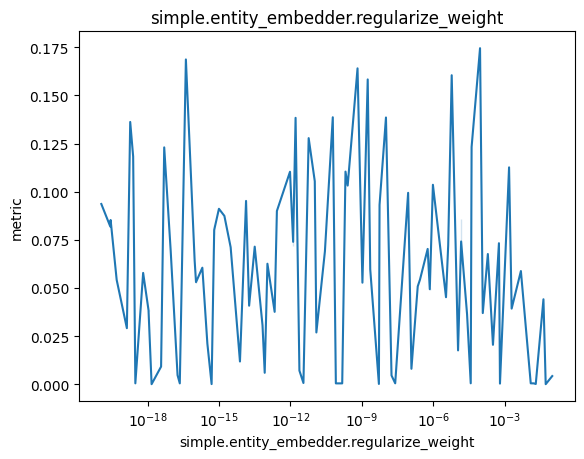

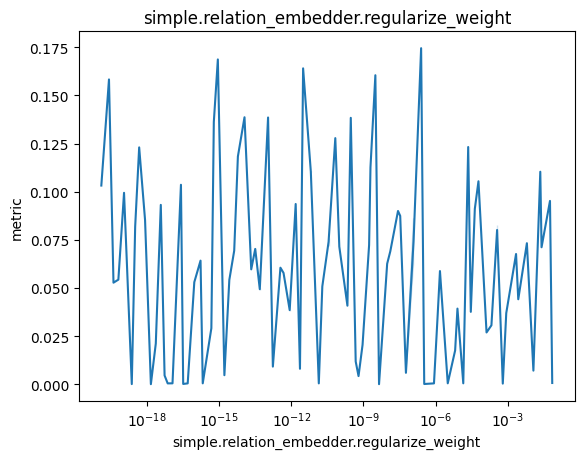

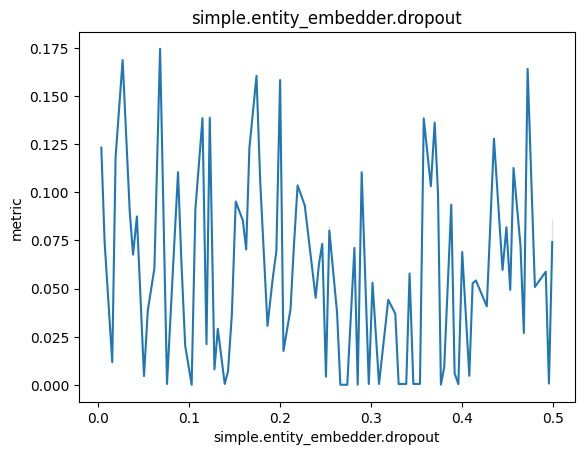

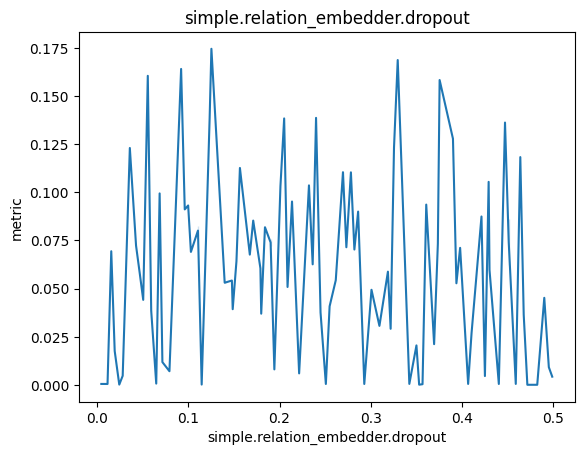

In [8]:
to_plot = ['epoch'] + list(trace.columns[15:])
for col in to_plot:
    plot(col)

# Immediate conclusions

- Remove Adadelta as an option for optimizer
- Remove 'se' as option for loss function
- Remove 32/64 dim as options in embeddings shape